<a href="https://colab.research.google.com/github/puwachat/Intern-Training/blob/main/Lesson01-LinearRegression/Lecture_1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone Github

In [2]:
!git clone https://github.com/puwachat/Intern-Training

Cloning into 'Intern-Training'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 0), reused 13 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [1]:
%cd Intern-Training/
!ls

/content/Intern-Training
Datasets  README.md


# Import Lib

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Datasets/01_insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Experiment 1: Basic

### selected feature

In [5]:
feature_columns = ['age','bmi','children']
target_columns  =  ['expenses']

In [6]:
x = df[feature_columns]
x

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0
...,...,...,...
1333,50,31.0,3
1334,18,31.9,0
1335,18,36.9,0
1336,21,25.8,0


In [7]:
y = df[target_columns]
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


### train test split

In [8]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size = 0.75, random_state=888)

In [9]:
x_train

,age,bmi,children
748,47,36.0,1
526,19,30.6,2
833,58,34.4,0
229,47,25.5,2
1192,58,32.4,1
...,...,...,...
1139,19,32.5,0
1174,29,32.1,2
1263,43,29.9,1
493,61,43.4,0


In [10]:
y_train

,expenses
748,8556.91
526,24059.68
833,11743.93
229,9225.26
1192,13019.16
...,...
1139,36898.73
1174,4433.92
1263,7337.75
493,12574.05


### Convert to Scaled Value

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_scaler = StandardScaler()
x_train_sc = x_scaler.fit_transform(x_train.to_numpy())
x_test_sc = x_scaler.transform(x_test.to_numpy())

#### Visualize compare

In [12]:
x_train.to_numpy(), x_test.to_numpy()

(array([[47. , 36. ,  1. ],
        [19. , 30.6,  2. ],
        [58. , 34.4,  0. ],
        ...,
        [43. , 29.9,  1. ],
        [61. , 43.4,  0. ],
        [56. , 32.1,  1. ]]), array([[46. , 38.2,  2. ],
        [29. , 31.2,  0. ],
        [18. , 23.8,  0. ],
        ...,
        [28. , 33. ,  2. ],
        [44. , 25.4,  1. ],
        [57. , 28.8,  4. ]]))

In [13]:
x_train_sc , x_test_sc

(array([[ 0.56662951,  0.85930258, -0.10385471],
        [-1.4400821 , -0.01680657,  0.71635217],
        [ 1.35498049,  0.59971469, -0.92406159],
        ...,
        [ 0.27995642, -0.13037627, -0.10385471],
        [ 1.56998531,  2.05989661, -0.92406159],
        [ 1.21164395,  0.22655708, -0.10385471]]),
 array([[ 0.49496123,  1.21623594,  0.71635217],
        [-0.72339938,  0.08053889, -0.92406159],
        [-1.51175037, -1.12005513, -0.92406159],
        ...,
        [-0.79506766,  0.37257528,  0.71635217],
        [ 0.35162469, -0.86046724, -0.10385471],
        [ 1.28331222, -0.30884295,  2.35676592]]))

In [14]:
y_scaler = StandardScaler()
y_train_sc = y_scaler.fit_transform(y_train.to_numpy())
y_test_sc = y_scaler.transform(y_test.to_numpy())

### model

In [15]:
model = LinearRegression()
model.fit(x_train_sc, y_train_sc)

LinearRegression()

### predict

In [16]:
y_pred_sc = model.predict(x_test_sc)
y_pred_sc

array([[ 0.41436797],
       [-0.21556517],
       [-0.68335789],
       [-0.25497737],
       [ 0.47025697],
       [-0.78140243],
       [-0.35019506],
       [ 0.5908358 ],
       [-0.07070645],
       [-0.83136659],
       [-0.26565174],
       [-0.17920653],
       [-0.60347322],
       [-0.07490379],
       [ 0.33016354],
       [ 0.19714897],
       [ 0.70944231],
       [-0.43454554],
       [ 0.16600117],
       [ 0.43712897],
       [-0.24413883],
       [ 0.49965129],
       [-0.03527276],
       [ 0.59547081],
       [ 0.31262126],
       [-0.00510189],
       [-0.57765078],
       [ 0.11014369],
       [ 0.15461279],
       [ 0.18088077],
       [ 0.65182346],
       [-0.32359372],
       [ 0.16424768],
       [ 0.07750298],
       [-0.12092331],
       [ 0.16741342],
       [ 0.25709714],
       [ 0.1372008 ],
       [-0.37543379],
       [-0.09046587],
       [ 0.22570687],
       [-0.28758421],
       [-0.31769252],
       [-0.41048448],
       [-0.58206695],
       [ 0

In [17]:
y_pred = y_scaler.inverse_transform(y_pred_sc)
y_pred

array([[18972.54418184],
       [10979.10285214],
       [ 5043.11790295],
       [10478.98773322],
       [19681.73922795],
       [ 3798.99652677],
       [ 9270.73720465],
       [21211.80603593],
       [12817.26573612],
       [ 3164.98385807],
       [10343.53686909],
       [11440.47030897],
       [ 6056.80238964],
       [12764.0041887 ],
       [17904.04483338],
       [16216.1765144 ],
       [22716.84538522],
       [ 8200.38453781],
       [15820.93117461],
       [19261.36642814],
       [10616.52172993],
       [20054.7339222 ],
       [13266.89612078],
       [21270.62120964],
       [17681.44470547],
       [13649.74475729],
       [ 6384.47229938],
       [15112.13613388],
       [15676.42005012],
       [16009.7435875 ],
       [21985.6996976 ],
       [ 9608.29086818],
       [15798.68052907],
       [14697.94677994],
       [12180.04643738],
       [15838.85169266],
       [16976.87979089],
       [15455.47323791],
       [ 8950.47423959],
       [12566.53152083],


In [18]:
y_pred_df = pd.DataFrame(y_pred, columns = ["y_pred"])
y_pred_df

,y_pred
0,18972.544182
1,10979.102852
2,5043.117903
3,10478.987733
4,19681.739228
...,...
330,17634.066600
331,21742.502240
332,12212.610654
333,12638.637081


In [19]:
y_test

,expenses
1121,8347.16
671,3943.60
121,1705.62
1011,18767.74
894,13555.00
...,...
1264,10370.91
246,12648.70
303,4349.46
967,7518.03


In [20]:
result_df = pd.concat([y_pred_df, y_test.reset_index(drop=True)], axis = 1)
result_df

,y_pred,expenses
0,18972.544182,8347.16
1,10979.102852,3943.60
2,5043.117903,1705.62
3,10478.987733,18767.74
4,19681.739228,13555.00
...,...,...
330,17634.066600,10370.91
331,21742.502240,12648.70
332,12212.610654,4349.46
333,12638.637081,7518.03


### Evaluate result

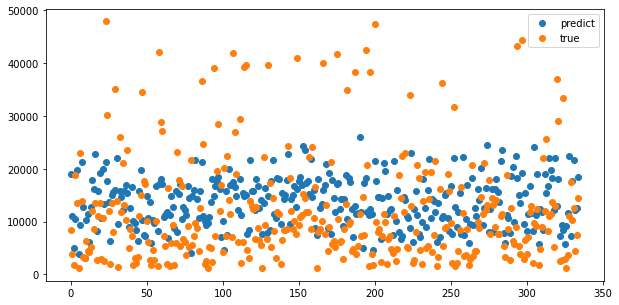

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(x = result_df.index, y = result_df['y_pred'], label = "predict")
plt.scatter(x = result_df.index, y = result_df['expenses'], label = "true")
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_values = mean_absolute_error(y_true = y_test.to_numpy(),
                                                    y_pred = y_pred)
mse_values = mean_squared_error(y_true = y_test.to_numpy(),
                                                    y_pred = y_pred)

print(f"MAE : {round(mae_values,2)}, MSE : {round(mse_values,2)}")

MAE : 8497.45, MSE : 100160591.62


## Experiment 2: Use One hot Encoder

In [23]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [24]:
feature_columns = ['age','bmi','children']
one_hot_columns = ['sex','smoker','region']
target_columns  =  ['expenses']

In [25]:
x_part1 = df[feature_columns]
x_part1

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0
...,...,...,...
1333,50,31.0,3
1334,18,31.9,0
1335,18,36.9,0
1336,21,25.8,0


### one-hot vs normal

original x_part2

In [26]:
x_part2 = df[one_hot_columns]
x_part2

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


one_hot_part2

In [27]:
x_part2_one_hot = pd.get_dummies(df[one_hot_columns])
x_part2_one_hot

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


concat x-part1, x-part2

In [28]:
x = pd.concat([x_part1, x_part2_one_hot], axis=1)
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,1,0,0,1,0,0
1334,18,31.9,0,1,0,1,0,1,0,0,0
1335,18,36.9,0,1,0,1,0,0,0,1,0
1336,21,25.8,0,1,0,1,0,0,0,0,1


In [29]:
y = df[target_columns]
y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


### train test split

In [30]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size = 0.75, random_state=888)

In [31]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
748,47,36.0,1,1,0,1,0,0,0,0,1
526,19,30.6,2,1,0,1,0,0,1,0,0
833,58,34.4,0,0,1,1,0,0,1,0,0
229,47,25.5,2,0,1,1,0,1,0,0,0
1192,58,32.4,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1139,19,32.5,0,1,0,0,1,0,1,0,0
1174,29,32.1,2,0,1,1,0,0,1,0,0
1263,43,29.9,1,1,0,1,0,0,0,0,1
493,61,43.4,0,0,1,1,0,0,0,0,1


In [32]:
y_train

,expenses
748,8556.91
526,24059.68
833,11743.93
229,9225.26
1192,13019.16
...,...
1139,36898.73
1174,4433.92
1263,7337.75
493,12574.05


In [33]:
model = LinearRegression()
model.fit(x_train.to_numpy(), y_train.to_numpy())

LinearRegression()

In [34]:
y_pred = model.predict(x_test.to_numpy())

In [35]:
y_pred

array([[12999.09909752],
       [ 5581.94793679],
       [ -100.17572621],
       [30131.39135091],
       [14721.79507228],
       [-1542.78575387],
       [ 3120.4101093 ],
       [15696.76733623],
       [ 6831.16442737],
       [-1477.98460107],
       [ 5352.39076003],
       [ 6081.79761597],
       [ 1245.86677974],
       [ 7013.55673042],
       [12993.4713603 ],
       [10595.5542884 ],
       [16909.42229225],
       [ 3037.07009353],
       [10604.82883755],
       [14239.18103869],
       [ 5160.03461136],
       [14267.38358193],
       [ 6947.71089245],
       [40340.46782893],
       [12910.42155658],
       [ 8941.64386867],
       [  927.28423639],
       [10810.77025993],
       [ 9867.87169521],
       [10846.25455644],
       [16457.97672156],
       [ 3579.74498064],
       [10640.34449741],
       [ 9980.47278638],
       [32158.80555797],
       [11393.43233864],
       [11607.66728702],
       [ 9628.43603358],
       [ 3576.37122395],
       [ 7894.72198856],


### Concat y_pred with y_test

In [36]:
y_pred_df = pd.DataFrame(y_pred, columns = ["y_pred"])
y_pred_df

,y_pred
0,12999.099098
1,5581.947937
2,-100.175726
3,30131.391351
4,14721.795072
...,...
330,12372.385268
331,16090.729988
332,6314.816328
333,7939.395157


In [37]:
y_test

,expenses
1121,8347.16
671,3943.60
121,1705.62
1011,18767.74
894,13555.00
...,...
1264,10370.91
246,12648.70
303,4349.46
967,7518.03


In [38]:
y_test.reset_index(drop=True)

,expenses
0,8347.16
1,3943.60
2,1705.62
3,18767.74
4,13555.00
...,...
330,10370.91
331,12648.70
332,4349.46
333,7518.03


In [39]:
result_df = pd.concat([y_pred_df, y_test.reset_index(drop=True)], axis = 1)
result_df

,y_pred,expenses
0,12999.099098,8347.16
1,5581.947937,3943.60
2,-100.175726,1705.62
3,30131.391351,18767.74
4,14721.795072,13555.00
...,...,...
330,12372.385268,10370.91
331,16090.729988,12648.70
332,6314.816328,4349.46
333,7939.395157,7518.03


### Evaluate result

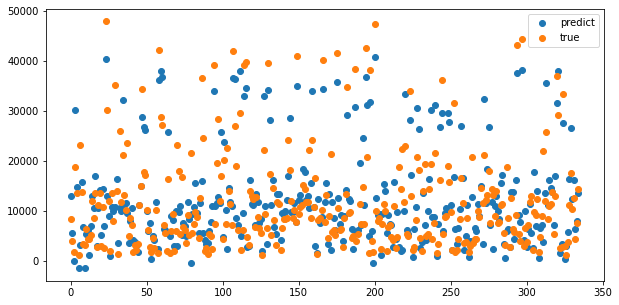

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(x = result_df.index, y = result_df['y_pred'], label = "predict")
plt.scatter(x = result_df.index, y = result_df['expenses'], label = "true")
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_values = mean_absolute_error(y_true = y_test.to_numpy(),
                                                    y_pred = y_pred)
mse_values = mean_squared_error(y_true = y_test.to_numpy(),
                                                    y_pred = y_pred)

print(f"MAE : {round(mae_values,2)}, MSE : {round(mse_values,2)}")

MAE : 4218.76, MSE : 38184667.31
